In [ ]:
!nvidia-smi

Thu Aug 29 14:36:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
from tensorflow.keras import datasets, layers, Model
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
class_names = {0: 'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle boot'}

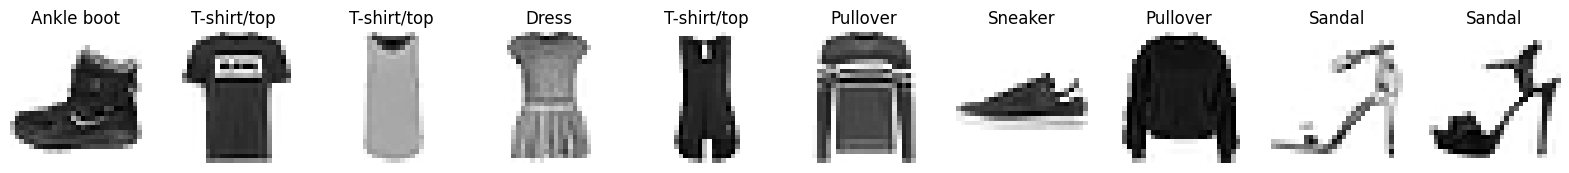

In [ ]:
fig, axes = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    axes[i].imshow(255-train_images[i], cmap='gray')
    axes[i].set_title(class_names[train_labels[i]])
    axes[i].axis('off')
plt.show()

In [ ]:
train_images_normalized = (train_images / 255.0).astype('float32')
test_images_normalized = (test_images / 255.0).astype('float32')

In [ ]:
X_train = train_images_normalized[:50000]
y_train = train_labels[:50000]
X_val = train_images_normalized[50000:]
y_val = train_labels[50000:]

## MLP Model

In [ ]:
train_images_mlp = X_train.reshape(X_train.shape[0], 784)
val_images_mlp = X_val.reshape(X_val.shape[0], 784)
test_images_mlp = test_images_normalized.reshape(test_images_normalized.shape[0], 784)

In [ ]:
input = layers.Input(shape=(784,))
x = layers.Dense(64, activation='relu')(input)
x = layers.Dense(32, activation='relu')(x)
output = layers.Dense(10, activation='softmax')(x)

model_mlp = Model(inputs=input, outputs=output)
model_mlp.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_mlp.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history_mlp = model_mlp.fit(train_images_mlp, y_train,
                    batch_size=128,
                    epochs=50,
                    validation_data=(val_images_mlp, y_val))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6657 - loss: 0.9531 - val_accuracy: 0.8438 - val_loss: 0.4553
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8459 - loss: 0.4395 - val_accuracy: 0.8483 - val_loss: 0.4246
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8582 - loss: 0.4021 - val_accuracy: 0.8582 - val_loss: 0.3992
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8699 - loss: 0.3685 - val_accuracy: 0.8662 - val_loss: 0.3760
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8748 - loss: 0.3502 - val_accuracy: 0.8734 - val_loss: 0.3630
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8801 - loss: 0.3327 - val_accuracy: 0.8748 - val_loss: 0.3557
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8838 - loss: 0.3211 - val_accuracy: 0.8741 - val_loss: 0.3546
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8893 - loss: 0.3018 - val_accuracy: 0.

<Axes: >

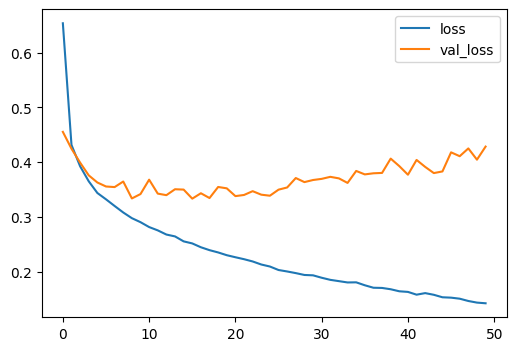

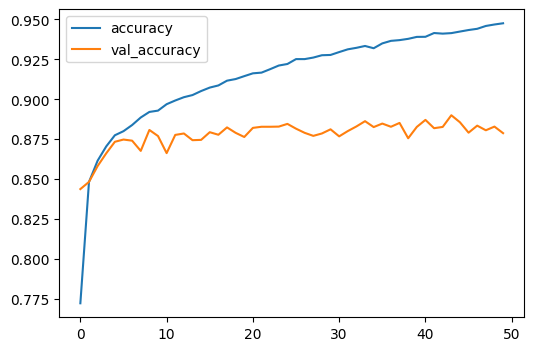

In [ ]:
import pandas as pd
history_pd_mlp = pd.DataFrame(history_mlp.history)
history_pd_mlp[['loss', 'val_loss']].plot(figsize=(6, 4))
history_pd_mlp[['accuracy', 'val_accuracy']].plot(figsize=(6, 4))

In [ ]:
loss, acc = model_mlp.evaluate(test_images_mlp, test_labels)
print('Test accuracy:', acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8725 - loss: 0.4458
Test accuracy: 0.8747000098228455


## CNN Model

In [ ]:
train_images_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
val_images_cnn = X_val.reshape(X_val.shape[0], 28, 28, 1)
test_images_cnn = test_images_normalized.reshape(test_images_normalized.shape[0], 28, 28, 1)

In [ ]:
inp = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, 3, padding='valid', activation="relu")(inp)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(16, 3, padding='valid', activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
out = layers.Dense(10, activation="softmax")(x)

model_cnn = Model(inputs=inp, outputs=out)
model_cnn.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          25,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,794 (112.48 KB)

 Trainable params: 28,794 (112.48 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history_cnn = model_cnn.fit(train_images_cnn, y_train,
                            batch_size=128,
                            epochs=50,
                            validation_data=(val_images_cnn, y_val))

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6182 - loss: 1.0736 - val_accuracy: 0.8147 - val_loss: 0.5073
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8291 - loss: 0.4725 - val_accuracy: 0.8411 - val_loss: 0.4351
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8548 - loss: 0.4104 - val_accuracy: 0.8574 - val_loss: 0.3963
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8623 - loss: 0.3818 - val_accuracy: 0.8624 - val_loss: 0.3824
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8717 - loss: 0.3579 - val_accuracy: 0.8668 - val_loss: 0.3709
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8741 - loss: 0.3463 - val_accuracy: 0.8718 - val_loss: 0.3587
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8796 - loss: 0.3294 - val_accuracy: 0.8746 - val_loss: 0.3473
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8873 - loss: 0.3121 - val_accuracy: 0.

<Axes: >

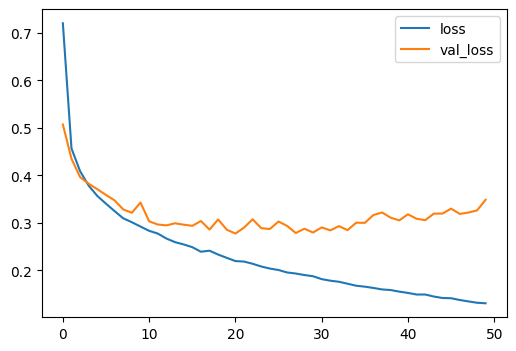

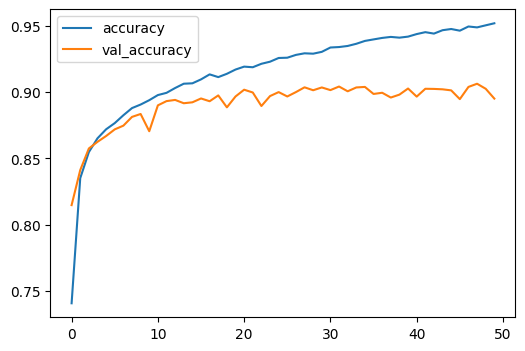

In [ ]:
import pandas as pd
history_pd_cnn = pd.DataFrame(history_cnn.history)
history_pd_cnn[['loss', 'val_loss']].plot(figsize=(6, 4))
history_pd_cnn[['accuracy', 'val_accuracy']].plot(figsize=(6, 4))

In [ ]:
loss, acc = model_cnn.evaluate(test_images_cnn, test_labels)
print('Test accuracy:', acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8900 - loss: 0.3681
Test accuracy: 0.892300009727478


In [ ]:
pred = model_cnn.predict(test_images_cnn[0].reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


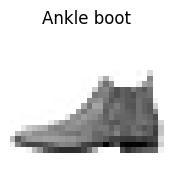

In [ ]:
plt.figure(figsize=(2, 2))
plt.imshow(255-test_images[0], cmap='gray')
plt.title(class_names[pred.argmax()])
plt.axis('off')
plt.show()

## Inspection

In [ ]:
weights, biases = model_cnn.layers[3].get_weights()
biases

array([ 0.12753108, -0.157768  ,  0.14967357, -0.0024722 ,  0.18769306,
        0.13189904, -0.13069387, -0.029066  , -0.08150651,  0.2469514 ,
       -0.21718514,  0.09536196,  0.36065412, -0.06970752, -0.0255681 ,
        0.10622975], dtype=float32)

In [ ]:
m1 = Model(inputs=inp, outputs=model_cnn.layers[3].output)
m1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 16)          │           2,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,480 (9.69 KB)

 Trainable params: 2,480 (9.69 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
m1_output = m1.predict(test_images_cnn)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
m1_output.shape

(10000, 26, 26, 16)

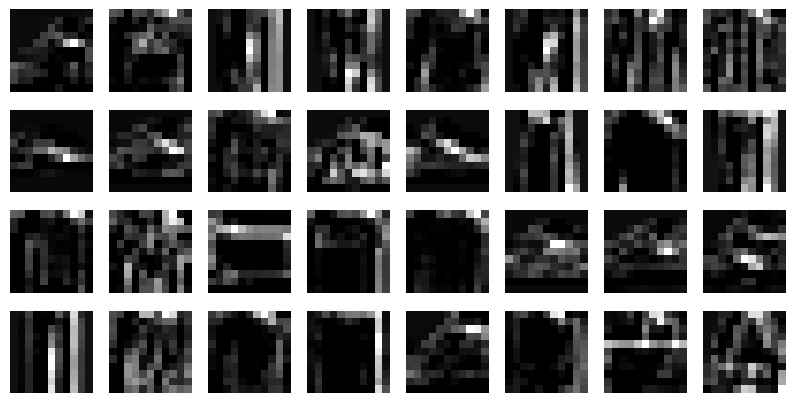

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(10, 5))
for i in range(32):
    axes[i//8, i%8].imshow(m1_output[i, :, :, 10], cmap='gray')
    axes[i//8, i%8].axis('off')
plt.show()